# Modelagem da Planta em Espaço de Estados

<img src="Untitled.jpg" alt="Solução em Espaço de Estados" width="75%"/>

$$
\bold{x} =  \begin{bmatrix}
            i_{RC} \\
            v_c
            \end{bmatrix}
\space ; \space
\bold{\dot{x}} =    \begin{bmatrix}
                    \dot{i_{RC}} \\
                    \dot{v_c}
                    \end{bmatrix}
$$

$$
\bold{A} =  \begin{bmatrix}
            -\dfrac{1}{C_2}(\dfrac{1}{R_1} + \dfrac{1}{R_2}) & \dfrac{1}{R_1R_2C_2} \\
            \dfrac{1}{C_1}          & 0
            \end{bmatrix}
\space ; \space
\bold{B} =  \begin{bmatrix}
            \dfrac{1}{R_1R_2C_2} \\
            0
            \end{bmatrix}
$$

$$
\bold{C} =  \begin{bmatrix}
            0 & 1
            \end{bmatrix}
\space ; \space
D =  0
$$


In [67]:
import numpy as np
import control as ct
import scipy.signal as sig
import matplotlib.pyplot as plt

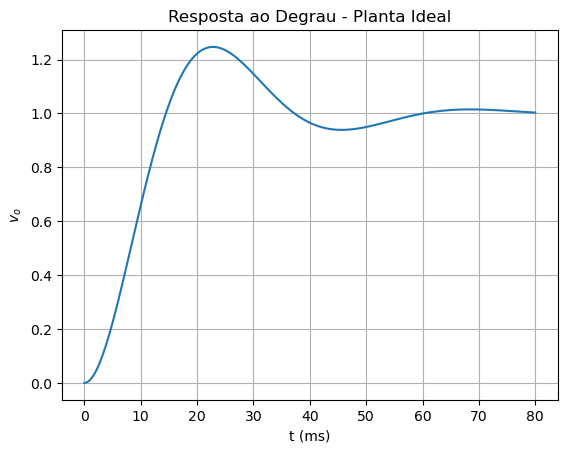

In [68]:
x0 = [0, 0]

t0   = 0
tf   = 80e-3
t    = np.linspace(t0, tf, 500)

NT = 18             # Emanuel(7) + Staub(5) + Araldi(6)
NP = 7              # Emanuel(7)
R1 = NT*2e3         # Resistência de Entrada
R2 = 18e3           # Resistência do Circuito RC
C1 = 100e-9         # Capacitância do Circuito RC
C2 = 680e-9         # Capacitância do Ampop

A  = [[-((1/(R1*C2))+(1/(R2*C2))) , -1/(R1*R2*C2)],
      [1/C1              , 0]]

B  = [[1/(R1*R2*C2)],
      [0]]

C  = [[0, 1]]

D  = 0

sys  = sig.StateSpace(A, B, C, D)
t, y = sig.step(sys, T=t)
tms  = t*1e3

plt.plot(tms, y)
plt.title("Resposta ao Degrau - Planta Ideal")
plt.xlabel("t (ms)")
plt.ylabel("$v_o$")
plt.grid()
plt.show()

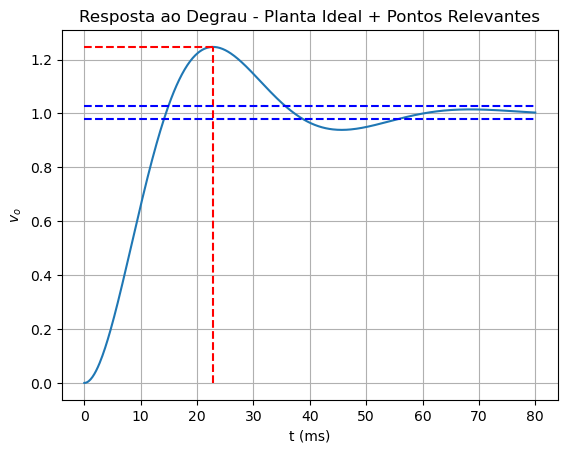

In [69]:
yM = np.max(y)
Mp = (yM-y[-1])/y[-1]
Tp = t[y==yM][0]
Δs = yM*2e-2 # Variação de 2% em função de steady state

plt.plot(tms, y)
## Pico
plt.plot(tms[t<=Tp], np.ones(len(t[t<=Tp]))*yM, 'r--')
plt.plot([Tp*1e3, Tp*1e3], [0, yM], 'r--')
## Acomodação de 2%
plt.plot(tms, np.ones(len(tms))*y[-1]*(1+Δs), 'b--') # Faixa de 2% (superior)
plt.plot(tms, np.ones(len(tms))*y[-1]*(1-Δs), 'b--') # Faixa de 2% (inferior)

plt.title("Resposta ao Degrau - Planta Ideal + Pontos Relevantes")
plt.xlabel("t (ms)")
plt.ylabel("$v_o$")
plt.grid()
plt.show()

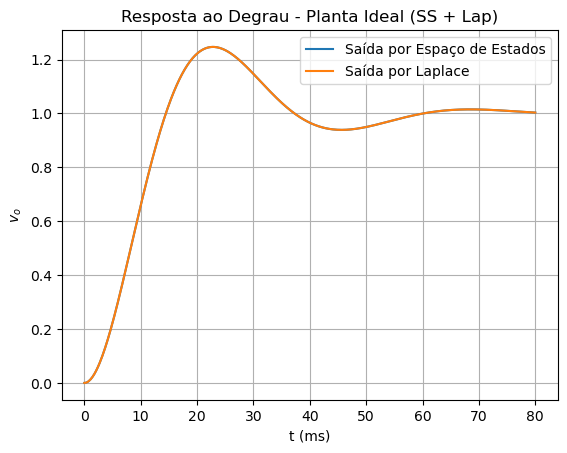

In [70]:
s  = ct.tf('s')
z  = (C1*R2+C1*R1)/(2*C1*C2*R1*np.sqrt(1/(C1*C2*R1*R2))*R2)
w2 = 1/(C1*C2*R1*R2)
w  = np.sqrt(w2)

G = w2/(s**2 + s*2*z*w + w2)
t_s, y_s = ct.step_response(G, T=t)
tms_s  = 1e3*t

plt.plot(tms, y)
plt.plot(tms_s, y_s)
plt.legend(["Saída por Espaço de Estados", "Saída por Laplace"])
plt.title("Resposta ao Degrau - Planta Ideal (SS + Lap)")
plt.xlabel("t (ms)")
plt.ylabel("$v_o$")
plt.grid()
plt.show()

Utilizando agora os valores reais da planta

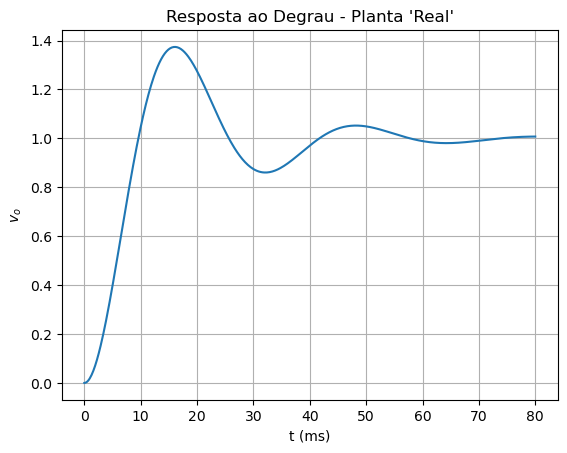

In [71]:
C1 = 54e-9

A  = [[-((1/(R1*C2))+(1/(R2*C2))) , -1/(R1*R2*C2)],
      [1/C1              , 0]]

sys  = sig.StateSpace(A, B, C, D)
t, y = sig.step(sys, T=t)
tms  = t*1e3

plt.plot(tms, y)
plt.title("Resposta ao Degrau - Planta 'Real'")
plt.xlabel("t (ms)")
plt.ylabel("$v_o$")
plt.grid()
plt.show()

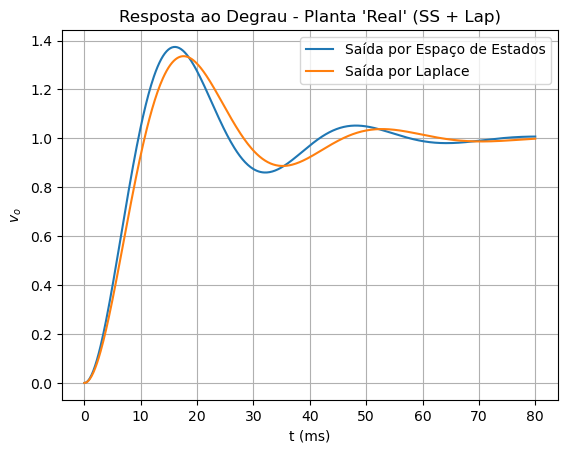

In [73]:
# Valores da planta real, obtidos experimentalmente
Mp = 168e-3/500e-3
Tp = 17.60e-3
ζ   = -np.log(Mp)/np.sqrt(np.pi**2 + np.log(Mp)**2)
ω   = np.pi/(Tp*np.sqrt(1-ζ**2))
ω2  = ω**2
G = ω2/(s**2 + s*2*ζ*ω + ω2)
t_s, y_s = ct.step_response(G, T=t)
tms_s  = 1e3*t

plt.plot(tms, y)
plt.plot(tms_s, y_s)
plt.legend(["Saída por Espaço de Estados", "Saída por Laplace"])
plt.title("Resposta ao Degrau - Planta 'Real' (SS + Lap)")
plt.xlabel("t (ms)")
plt.ylabel("$v_o$")
plt.grid()
plt.show()